In [4]:
from pruners.SparsitySchedulers import StepSparsityScheduler, CubicSparsityScheduler
from matplotlib import pyplot as plt

step_scheduler = StepSparsityScheduler(
    final_sparsity=0.5,
    total_train_steps=1000,
    pruning_start_step=0.1,
    pruning_end_step=0.9,
    sparsity_delta=0.1
)

cubic_scheduler = CubicSparsityScheduler(
    initial_sparsity=0.1,
    final_sparsity=0.5,
    total_train_steps=1000,
    pruning_start_step=100,
    pruning_end_step=900,
    pruning_interval=10
)

print (step_scheduler.pruning_interval, step_scheduler.num_pruning_steps)


200 4


In [11]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2", cache_dir="./cache")

c:\Users\mingx\anaconda3\envs\mingxuan\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\mingx\anaconda3\envs\mingxuan\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mingx\.cache\huggingface\hub\models--openai-community--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see act

In [20]:
model.state_dict().keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'transformer.h.2.ln_1.weight', 'transformer.h.2.ln_1.bias', 'transformer.h.2.attn.c_attn.weight', 'transformer.h.2.attn.

In [5]:
import yaml
from pruners import SparsitySchedulers

with open("config.yaml", 'r') as f:
    cfg = yaml.safe_load(f)

from pruners.utils import _compile_target_modules

if cfg["Arguments"]["with_tracking"]:
    print ("with tracking")


with tracking


In [6]:
cfg

{'Sparsity_Scheduler': {'name': 'CubicSparistyScheduler',
  'params': {'initial_sparsity': 0.1,
   'final_sparsity': 0.5,
   'total_train_steps': 1000,
   'pruning_start_step': 100,
   'pruning_end_step': 900,
   'pruning_interval': 100}}}

100 0.1
300 0.2
500 0.30000000000000004
700 0.4
900 0.5


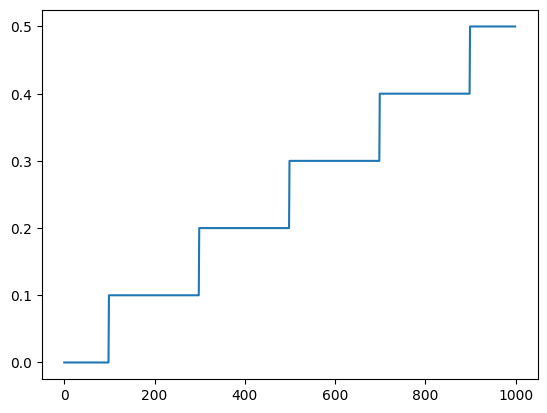

In [5]:
s = []
for step in range(1000):
    sparsity, pruning_action = step_scheduler.get_sparsity_and_action(step+1)
    s.append(sparsity)
    if pruning_action == "sparsity":
        print (step+1, sparsity)
plt.plot(s)
plt.show()

sparsity 0.09999999999999998
sparsity 0.23203124999999997
sparsity 0.33125
sparsity 0.40234375
sparsity 0.45
sparsity 0.47890625
sparsity 0.49375
sparsity 0.49921875
sparsity 0.5
mask 0.5


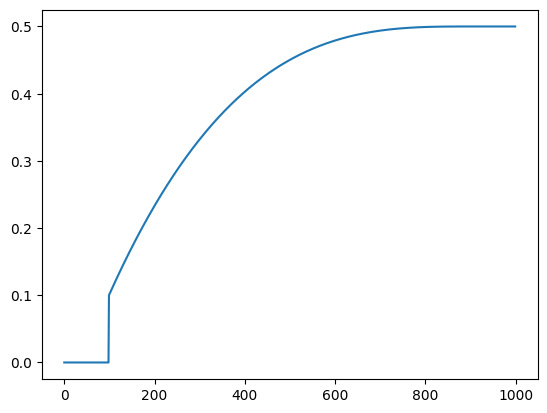

In [6]:
s = []
for step in range(1000):
    sparsity, pruning_action = cubic_scheduler.get_sparsity_and_action(step+1)
    s.append(sparsity)
    if (step+1 - cubic_scheduler.pruning_start_step) % 100 == 0:
        print (pruning_action, sparsity)
plt.plot(s)
plt.show()

0